In [1]:
import numpy as np
from matplotlib import pyplot as plt
import warnings
from GP_R import GPR

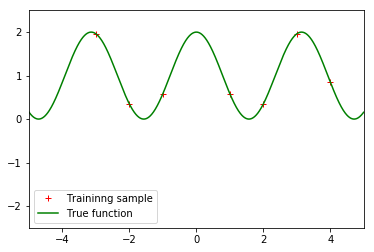

In [74]:
# X_train = np.sort(np.random.uniform(-5, 5, 5))[:, np.newaxis]
X_train = np.array([-3,-2,-1,1,2,3,4])[:, np.newaxis]
Y_train = np.cos(2*X_train)+1
X_test = np.arange(-5, 5, 0.005)[:, np.newaxis]
fig, ax = plt.subplots()
ax.plot(X_train, Y_train, 'r+',label="Traininng sample")
ax.legend(); # 显示图例
ax.set_xlim(-5, 5)
ax.set_ylim(-2.5, 2.5)

y_test_true = np.cos(2*X_test)+1
ax.plot(X_test, y_test_true, 'g',label="True function")
ax.legend(); # 显示图例
fig

In [75]:
model = GPR()

In [76]:
model.fit(X_train,Y_train)

Optimized l and sigma_y:  (0.74415884971859325, 7.4375052249290335e-05)


In [77]:
mean, var = model.predict(X_test)

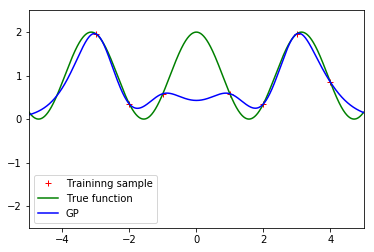

In [78]:
ax.plot(X_test, mean, 'b',label="GP")
ax.legend(); # 显示图例
fig

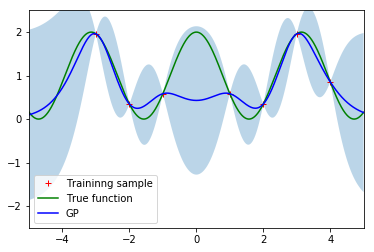

In [79]:
# compute 95% confidence interval from pointwise variances and plot
pointwise_variances = var.diagonal()
error = 1.96 * np.sqrt(pointwise_variances)
ax.fill_between(X_test[:, 0], mean.ravel() - error, mean.ravel() + error, alpha=0.3)
ax.legend(); # 显示图例
fig

#### 和RF对比

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
model = RandomForestRegressor()
model.fit(X_train,Y_train)

/home/hadoop/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [82]:
y_pre = model.predict(X_test)

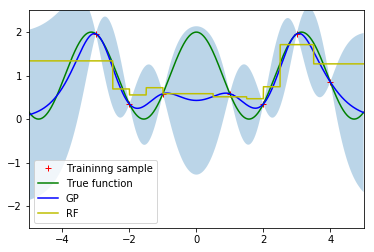

In [83]:
ax.plot(X_test, y_pre, 'y',label="RF")
ax.legend(); # 显示图例
fig

#### 多维

In [58]:
X = np.random.rand(10, 3)
y_sample = np.sum(X,axis=-1)+1
X_test = np.random.rand(5, 3)

In [59]:
model.fit(X, y_sample)

Optimized l and sigma_y:  (2.8384891967015662, 1.0000000000000001e-05)


In [60]:
mean, var = model.predict(X_test)

In [61]:
mean

array([ 3.54924962,  2.73944152,  2.64269042,  2.38757299,  3.32373789])

In [63]:
var.diagonal()

array([  2.26577060e-03,   2.44682791e-04,   4.42177184e-05,
         1.48466343e-04,   1.23128219e-03])